In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Constants
GRAVITATIONAL_ACCELERATION = 9.81  # m/s^2
HORSEPOWER_TO_WATTS = 745.7  # 1 HP = 745.7 Watts
METERS_TO_FEET = 3.28084
METERS_PER_SECOND_TO_MPH = 2.23694
SIXTY_FOOT_IN_METERS = 60/METERS_TO_FEET
TWO_HUNDRED_FEET_IN_METERS = 200/METERS_TO_FEET

class Car:
    def __init__(self, mass, horsepower, max_longitudinal_acceleration_fraction):
        self.mass = mass  # kg
        self.power = horsepower * HORSEPOWER_TO_WATTS  # Convert HP to Watts
        self.max_acceleration = max_longitudinal_acceleration_fraction * GRAVITATIONAL_ACCELERATION  # m/s^2
        self.velocity = 1.3  # m/s (starting with a small value to emulate rollout of 1 ft)
        self.position = 0  # meters
        self.long_acc = max_longitudinal_acceleration_fraction * GRAVITATIONAL_ACCELERATION

    def update_position_and_velocity(self, time_step):
        """ Update the car's position and velocity based on the time step."""
        # Calculate force based on power and velocity
        force = self.power / self.velocity

        # Calculate acceleration based on force and mass
        acceleration = force / self.mass

        # Cap the acceleration to the maximum allowable
        if acceleration > self.max_acceleration:
            acceleration = self.max_acceleration

        # Update velocity and position
        self.velocity += acceleration * time_step
        self.position += self.velocity * time_step
        self.long_acc = acceleration

def simulate_dragstrip_launch(car, total_time, time_step):
    """Simulate the car's launch for a given total time and time step."""
    times = []
    positions = []
    velocities = []
    long_acc = []

    did_60=False
    did_200=False
    t60=None
    t200=None
    

    for t in np.arange(0, total_time, time_step):
        car.update_position_and_velocity(time_step)
        times.append(t)
        positions.append(car.position)
        velocities.append(car.velocity)
        long_acc.append(car.long_acc)
        if(car.position > SIXTY_FOOT_IN_METERS and not did_60):
            print(f'60ft time = {t:.3f}')
            did_60=True
            t60=t
        if(car.position > TWO_HUNDRED_FEET_IN_METERS and not did_200):
            print(f'200ft time = {t:.3f}')
            did_200=True
            t200=t

    return np.array(times), np.array(positions), np.array(velocities), np.array(long_acc),t60,t200

# Example usage

# say a CTR 
HP=260  #horsepower car 1
MASS=1410 #kg mass car 1

HP=190  #horsepower car 2
MASS=1310 #kg mass car 2

LONG_AWD=1.1 # Roughly peak clutch dump longitudinal G AWD can support
LONG_2WD=0.8

car = Car(mass=MASS, horsepower=HP, max_longitudinal_acceleration_fraction=LONG_2WD)
times, positions, velocities, long_acc,t60,t200 = simulate_dragstrip_launch(car, total_time=7, time_step=.001)

    # Output results or plot them as needed

car2 = Car(mass=MASS, horsepower=HP, max_longitudinal_acceleration_fraction=LONG_AWD)
times2, positions2, velocities2, long_acc2,t60_2,t200_2 = simulate_dragstrip_launch(car2, total_time=7, time_step=.001)

print(f'60ft time diff = {t60-t60_2:.3f}  200ft time diff = {t200-t200_2:.3f} - ratio is {(t200-t200_2)/(t60-t60_2)}')

def plot_XvT():
    plt.plot(times,positions*METERS_TO_FEET, label='#1 ft')
    plt.plot(times2, positions2*METERS_TO_FEET, label='#2 ft')
    plt.xlabel('Time (seconds)'); plt.ylabel('Distance (feet)')
    plt.legend()

def plot_VvT ():
    plt.plot(times,velocities*METERS_PER_SECOND_TO_MPH, label='#1 mph'); plt.plot(times2, velocities2*METERS_PER_SECOND_TO_MPH, label='#2 mph')
    plt.xlabel('Time (seconds)'); plt.ylabel('Spped (mph)')
    plt.legend()
def plot_LongG():
    plt.plot(times,long_acc/GRAVITATIONAL_ACCELERATION, label='#1 G'); plt.plot(times2, long_acc2/GRAVITATIONAL_ACCELERATION, label='#2 G')
    plt.xlabel('Time (seconds)'); plt.ylabel('Long G ')
    plt.legend()


60ft time = 2.001
200ft time = 3.946
60ft time = 1.776
200ft time = 3.669
60ft time diff = 0.225  200ft time diff = 0.277 - ratio is 1.2311111111111124


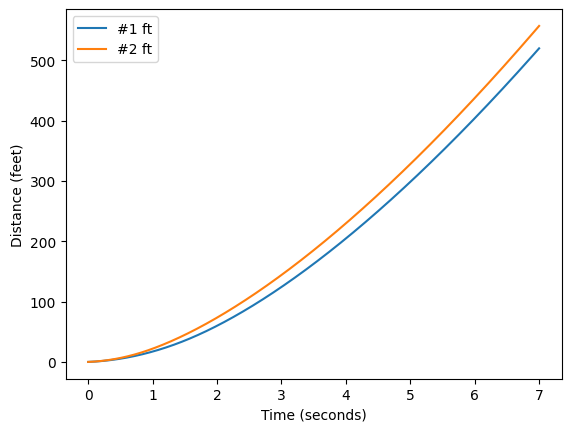

In [2]:
plot_XvT()

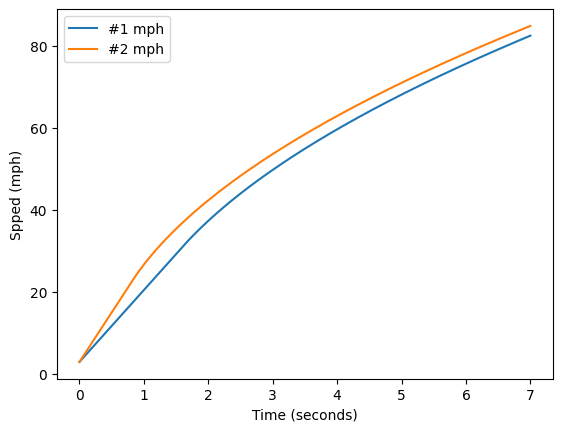

In [3]:
plot_VvT()

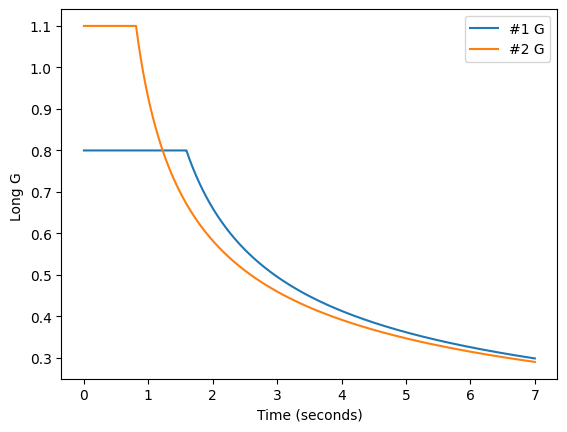

In [4]:
plot_LongG()
